In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
pdx_by_date = pd.read_csv('../data/By_Date/pdx_by_date.csv')
metro_by_date = pd.read_csv('../data/By_Date/metro_by_date.csv')
divvy_by_date = pd.read_csv('../data/By_Date/divvy_by_date.csv')
citi_by_date = pd.read_csv('../data/By_Date/citi_by_date.csv')
capital_by_date = pd.read_csv('../data/By_Date/capital_by_date.csv')
bay_by_date = pd.read_csv('../data/By_Date/bay_by_date.csv')

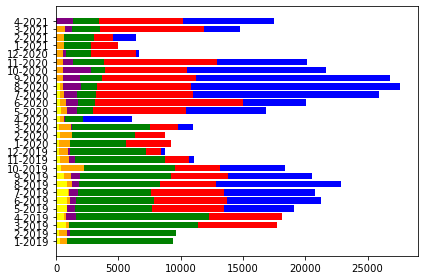

In [30]:
fig = figsize=(50,50)

plt.barh('m_y', 'ride_count', data=divvy_by_date, color='blue')
plt.tight_layout()

plt.barh('m_y', 'ride_count', data=capital_by_date, color='red')
plt.tight_layout()

plt.barh('m_y', 'ride_count', data=bay_by_date, color = 'green')
plt.tight_layout()

plt.barh('m_y', 'ride_count', data=citi_by_date, color='purple')
plt.tight_layout()

plt.barh('m_y', 'ride_count', data=metro_by_date, color='orange')
plt.tight_layout()

plt.barh('m_y', 'ride_count', data=pdx_by_date, color='yellow')
plt.tight_layout()


# legend.show()